# Capstone Project - 
## Web scrapping & Visualisation

Objectives: Stakeholders have asked to us to provide some insights on their dataframe and publish these insights as either graphs or tables.

### Project Requirments:

5. We need to find out by region if our CPA – cost per acquisition is higher or lower than the average as per the research found on https://mystaticwebsite-3.s3.amazonaws.com/index.html

### Last Updates

In [1]:
from datetime import datetime, timedelta

print(f"Last Updated: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")

Last Updated: 08/11/2022 19:42:27


## Importing Packages

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#Imported the clean test_data
df = pd.read_csv('C:/Users/YasminaAwedOmar/Documents/Capstone Project/test_data_clean.csv')
#Formating 
pd.options.display.float_format = '{:,.0f}'.format

### Cleaning the test_data

In [4]:
#remove 'UK' infront of the region names to help with merging
df['uk_region'] = df['uk_region'].str.replace("UK",'').astype(str)

In [5]:
#Grouped the data in a series 
df_group = df.groupby(['uk_region'])['cpa'].mean()
df_group

uk_region
 North        4
 North East   3
 South East   3
Name: cpa, dtype: float64

In [6]:
#Grouped in dataframe
df_group = df.groupby(['uk_region'],as_index=False)['cpa'].mean()
df_group

,uk_region,cpa
0,North,4
1,North East,3
2,South East,3


## WebScrapping

In [7]:
#Create an URL object
URL = "https://mystaticwebsite-3.s3.amazonaws.com/index.html"

#Create object page
page = requests.get(URL)
print(page.text)

<HTML>
<HEAD>
</HEAD>
<BODY>
<H1>Marketing Data October 2021</H1>
  
  <table style="width: 100%">
    <tr style="font-weight: bold">
      <th style="width: 50%">Region</td>
      <th style="">Average CPA by Region</td>
    </tr>
    <tr>
      <td class="region">South East</td>
      <td id="south_east">&pound;10.00</td>
    </tr>
   <tr>
      <td class="region">North East</td>
      <td id="north_east">&pound;10.00</td>
    </tr>
    <tr>
      <td class="region">North</td>
      <td id="north">&pound;8.00</td>
    </tr>
  
  <tr>
      <td class="region">South</td>
      <td id="south">&pound;10.00</td>
    </tr>
  
  
  
  
  </table>
</BODY>
</HTML>



In [8]:
#Obtain the relavant information from the website
soup = BeautifulSoup(page.content, "html.parser")  
result1  = soup.find(id="south_east")
result2 = soup.find(id="north_east")
result3 = soup.find(id="north")
result4 = soup.find(id="south")

print(result1.prettify())
print(result2.prettify())
print(result3.prettify())
print(result4.prettify())

<td id="south_east">
 £10.00
</td>

<td id="north_east">
 £10.00
</td>

<td id="north">
 £8.00
</td>

<td id="south">
 £10.00
</td>



In [9]:
#Read HTML [marketing Data 2021] table
table = soup.table
df_market = pd.read_html(str(table))[0] #convert the soup to str first
df_market

,Region,Average CPA by Region
0,South East,£10.00
1,North East,£10.00
2,North,£8.00
3,South,£10.00


### Cleaning the Scraped Marketing Data

In [10]:
#remove the pound £ sign
df_market['Average CPA by Region'] = df_market['Average CPA by Region'].str.replace("£",'').astype(float)

In [11]:
#Changing the 'Region' column to 'uk_region'
df_market = df_market.rename(columns={"Region":"uk_region"})

In [12]:
df_market

,uk_region,Average CPA by Region
0,South East,10
1,North East,10
2,North,8
3,South,10


In [13]:
#checking the datatype for the marketing data
df_market['Average CPA by Region'].dtypes

dtype('float64')

In [14]:
#checking the data type for the tes_data
df['cpa'].dtypes

dtype('int64')

In [15]:
#changing marketing dataframe into int - helping with the merge
df_market['Average CPA by Region'].astype(int)

0    10
1    10
2     8
3    10
Name: Average CPA by Region, dtype: int32

#### Merging the dataframes

In [16]:
#Merging the test_data(shakeholders) with the market data
df2=pd.concat([df_market, df_group],axis=1, join="outer")
df2

,uk_region,Average CPA by Region,uk_region,cpa
0,South East,10,North,4
1,North East,10,North East,3
2,North,8,South East,3
3,South,10,NaN,NaN


### 5. Stakeholders Data vs Marketing Data 2021

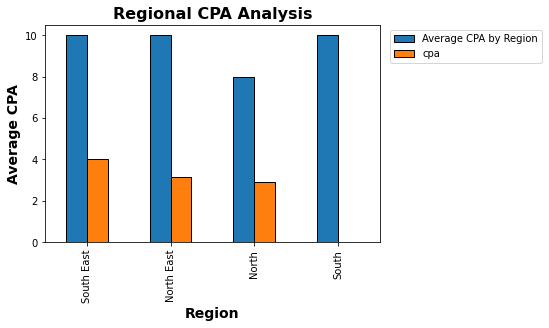

In [17]:
#Plotting the barchart 
df2.plot(kind='bar',width = 0.5, edgecolor='black' )

#Setting the location and labels of the x-axis
plt.xticks([0, 1, 2, 3], ['South East', 'North East', 'North', 'South'])  

#Title for the barchart
plt.title('Regional CPA Analysis', fontsize=16, weight = 'bold')
           
#Labelling the x, and y axix
plt.ylabel('Average CPA', fontsize=14,weight = 'bold')
plt.xlabel('Region', fontsize=14,weight = 'bold')

#Changing the legend location
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

#saving the graph
plt.savefig(r'C:/Users/YasminaAwedOmar/Documents/cpa_comparison.png', bbox_inches='tight', facecolor=(1,1,1))

#Visualising the barchart
plt.show()

#### Evaluation:

From the barchart, we can see that the stakeholders cost per acquisition (CPA) average is substantially lower than the CPA average obtainted in the market data. 